# Convolutional Neural Network (CNN)

Tal como vimos en el notebook anterior, las ANN pueden ser útiles para algunos problemas de análisis de imágenes, pero presentan algunas limitaciones y problemas. Ahora vamos a discutir cómo las CNNs se puede utilizar para resolver la mayoría de estos problemas.

**NOTA**: Este notebook ha sido creado a partir de recursos disponibles en la web que se listan a continuación. La fuente de las imágenes originales se puede consultar directamente el markdown insertado en la celda de texto. 
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- https://towardsdatascience.com/introduction-to-convolutional-neural-network-cnn-de73f69c5b83
- https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
- https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

## La arquitectura *LeNet* (años 90)

*LeNet* fue una de las primeras redes neuronales convolucionales (también llamadas *ConvNet*) que ayudó a impulsar el campo del aprendizaje profundo. Cuando fue creada, LeNet se usaba principalmente para tareas de reconocimiento de caracteres, como leer códigos postales, dígitos, etc.

A continuación, veremos una intuición de cómo la arquitectura LeNet aprende a reconocer imágenes. Vale la pena aclarar que se han propuesto varias arquitecturas nuevas en los últimos años que son mejoras sobre LeNet, pero todas utilizan los conceptos principales de LeNet y son relativamente más fáciles de entender si tiene una comprensión clara de la primera.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=1493)

La ConvNet de la figura es similar en arquitectura a la LeNet original y clasifica una imagen de entrada en cuatro categorías: perro, gato, bote o pájaro. Como es evidente en la figura anterior, al recibir una imagen de barco como entrada, la red asigna correctamente la mayor probabilidad de barco (0.94) entre las cuatro categorías. La suma de todas las probabilidades en la capa de salida debe ser 1.

Hay cuatro operaciones principales en la ConvNet de la figura anterior:

* Convolución
* Función de activación / No linealidad (ReLU)
* Pooling o Submuestreo
* Clasificador (capas completamente conectada)

Estas operaciones son los componentes básicos de cada ConvNet, por lo que comprender cómo funcionan es un paso importante para desarrollar una comprensión sólida de esta tecnología. Intentaremos comprender la intuición detrás de cada una de estas operaciones a continuación.

## Convolución

Las ConvNets derivan su nombre del operador *convolución*. El propósito principal de una convolución es extraer características de la imagen de entrada. La convolución preserva la relación espacial entre píxeles al aprender las características de la imagen utilizando pequeñas regiones de datos de la imagen de entrada.

![](https://miro.medium.com/max/4680/1*p-_47puSuVNmRJnOXYPQCg.png)

En la terminología de CNN, la matriz 3×3 se llama *filtro*, *kernel* o *detector de características*, y el resultado de aplicar el filtro sobre toda la imagen se llama, *mapa de activación* o *feature map*.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png)

Como ya sabemos, diferentes valores para el filtro producirán diferentes feature maps para la misma imagen de entrada. En la siguiente imagen se puede observar este comportamiento.

![](https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif?w=480&zoom=2)

En la práctica, **una CNN aprende los valores de estos filtros por sí sola** durante el proceso de entrenamiento (aunque aún necesitamos especificar parámetros como el número de filtros, el tamaño del filtro, la arquitectura de la red, etc. antes del proceso de entrenamiento). Cuantos más filtros tengamos, más características visuales se extraerán. 

El tamaño de la salida (es decir, el conjunto de los feature maps) se controla mediante tres parámetros que debemos decidir antes de realizar la convolución:

* *Profundidad*: corresponde al número de filtros que usamos para la operación de convolución. Por ejemplo, en la figura realizamos una convolución usando 3 filtros distintos, produciendo así 3 feature maps diferentes. Se puede pensar en estos 3 feature maps como 3 matrices 2D apiladas.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-42-35-am.png?w=802&h=402)

* *Stride*: stride (o paso) es el número de píxeles en el que deslizamos el filtro sobre la imagen de entrada. Tener un paso más grande producirá feature maps más pequeños.

![](https://miro.medium.com/max/840/1*L4T6IXRalWoseBncjRr4wQ@2x.gif)

![](https://miro.medium.com/max/840/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif)

* *Padding*: a veces es conveniente rellenar la imagen de entrada con pixeles auxiliares alrededor del borde, para aplicar el filtro a los elementos en los bordes de la imagen. Agregar relleno se conoce como *convolución amplia* (wide convolution), y no usar relleno como *convolución estrecha* (narrow convolution).

![](https://miro.medium.com/max/840/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)

## Función de activación / No linealidad (ReLU)

Después de cada operación de convolución, LeNet utiliza una operación adicional llamada *ReLU*. Como vimos en la revisión de los conceptos de ANN, ReLU significa *unidad lineal rectificada* y es una función de activación que realiza una operación no lineal, lo cual es una característica deseable en las ConvNets (aunque vamos a omitir los detalles). Su salida está dada por:

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-2-23-48-am.png?w=1071&h=336)

La operación ReLU se puede entender claramente a partir de la siguiente imagen, donde la imagen de la izquierda ha sido umbralizada a cero, es decir, reemplaza los valores negativos (píxeles oscuros) del feature map de entrada con cero.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-18-19-pm.png?w=1496)

Un feature map de salida como éste se denomina feature map *rectificado*. Como ya sabemos, también se pueden usar otras funciones no lineales, como *tanh* o *sigmoide* en lugar de ReLU, pero se ha encontrado que ReLU funciona mejor en la mayoría de las situaciones.
Esta operación no modifica las dimensiones de los feature maps.


## Pooling o Submuestreo

Esta operación si modifica las dimensiones del feature map.

La idea del *pooling espacial* (también llamado submuestreo) es reducir la dimensionalidad de cada feature map, reteniendo la información más importante. El pooling espacial puede ser de diferentes tipos: *Max*, *Mean*, *Sum*, etc. Un pooling típico consiste en tomar una ventana de 2×2 con desplazamiento de 2 píxeles. 

Para el caso de **Max** pooling se toma el valor máximo dentro de esa ventana como valor del nuevo **pooled featured map**. 

![](https://miro.medium.com/max/840/1*vOxthD0FpBR6fJcpPxq6Hg.gif)

Para el caso de **Mean** polling se toma el promedio de los valores de la ventana como valor del nuevo pixel en el **pooled featured map**. 

![](https://miro.medium.com/max/569/1*5U2dM5N8uI4eEunolJHRhg.jpeg)

Como se muestra en ambas figuras, esta operación reduce la dimensionalidad del feature map de entrada. Esta reducción depende tanto del tamaño de la ventana como del desplazamiento establecido.

La figura de abajo muestra el efecto de dos tipos de pooling (Max y Sum) sobre una feature map rectificado:

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-11-53-pm.png)

En particular, la operación de pooling tiene las siguintes ventajas:

* reduce sistemáticamente las dimensiones del feature map de entrada, produciendo una salida más pequeñas y manejable;
* reduce el número de parámetros y cálculos en la red(controlando el overfitting);
* hace que la red sea invariable a pequeñas transformaciones, distorsiones y traslaciones en la imagen de entrada.

En la red que se muestra a continuación, la operación de pooling se aplica por separado a cada feature map (tener en cuenta que obtenemos 3 features maps de salida a partir de los tres feature maps de entrada).

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-19-37-pm.png?w=802&h=438)


Recopilemos todo lo visto hasta el momento. Ya vimos cómo funcionan las operaciones de convolución, activación y pooling. Es importante comprender que estas capas son los componentes básicos de cualquier CNN, ya que se encargan de extraer las features de las imágenes de entrada. 

Ahora volvamos a mirar la arquitectura original presentada al inicio del notebook.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-08-at-2-26-09-am.png?w=1496)

Como se muestra en la figura, tenemos un conjunto de capas (*1st convolución+ReLU*, *1st Pooling*, *2nd convolución+ReLU* y *2nd Pooling*) que en conjunto extraen las features representativas de las imágenes, introducen la no linealidad en la red y reducen la dimensión de las features, mientras intentan que las features sean invariantes en la escala y traslación.

La salida de la segunda capa de pooling (*2nd Pooling* en la figura) actúa como una entrada a la capa totalmente conectada (*Fully Connected* en la figura), que se encarga especificamente de realizar la clasificación de las imágenes.

## Capa totalmente conectada (ANN)

La capa totalmente conectada es un MPL tradicional, similar a la que discutimos en el notebook anterior,  aunque también se podríía usar otros clasificadores como ser SVM, Random Forest, Desicion Tree, etc. 

En este punto es importante remarcar que la salida de las capas convolucionales y pooling representan **features visuales de alto nivel** de la imagen de entrada. El propósito de la capa totalmente conectada es usar estas features para clasificar una nueva imagen de entrada en una de varias clases. 

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-06-at-12-34-02-am.png?w=968&h=304)



## Poniendo todo junto: entrenamiento mediante Backpropagation

Como se discutió anteriormente, las capas convolución + pooling actúan como extractores de features de la imagen de entrada, mientras que la capa completamente conectada actúa como un clasificador.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png?w=1496)

El entrenamiento de esta red se realiza mediante el algoritmo BackProp que vimos en el notebook anterior. Entrenar una ConvNet significa esencialmente que todos los pesos y parámetros de la red se han optimizado para clasificar correctamente las imágenes del conjunto de entrenamiento.

Una vez entrenado el modelo, cuando se ingresa una nueva imagen en ConvNet la red propaga hacia adelante la información hasta la capa de salida, entregando una probabilidad para cada clase. Si nuestro conjunto de entrenamiento es lo suficientemente grande, la red (con suerte) **generalizará** bien a nuevas imágenes no observadas, y en su mayoría las clasificará en las categorías correctas.

Ahora si, ya podemos comenzar con la práctica de este laboratorio.

# CNN para clasificación de imágenes

Tutorial extraído de https://www.tensorflow.org/tutorials/images/cnn

Este tutorial muestra el entrenamiento de un *red neuronal convolucional* (CNN) para clasificar imágenes del dataset [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html). Dado que el tutorial utiliza [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), la creación y el entrenamiento del modelo consiste sólo en unas pocas líneas de código.

[TensorFlow](https://www.tensorflow.org/) es una biblioteca de código abierto para machine learning desarrollado por Google para construir y entrenar redes neuronales profundas. El nombre TensorFlow deriva de las operaciones que tales redes neuronales realizan sobre **arrays multidimensionales de datos**. Estos arrays multidimensionales son referidos como "tensores".

Además de este notebook, si te quedas con ganas más, te recomiendo chequear este tutorial https://www.tensorflow.org/tutorials/images/classification.

## Importar TensorFlow

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Descargar y procesar el dataset CIFAR10

El dataset CIFAR10 contiene 60.000 imágenes en color para 10 clases, con 6.000 imágenes en cada clase. El conjunto de datos se divide en 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba. las clases son mutuamente excluyentes y no hay solapamiento entre ellas.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


## Verificar los datos

Para verificar que el dataset es correcto, vamos a mostrar las primeras 25 imágenes del conjunto de entrenamiento y junto al nombre de su clase debajo de cada imagen.


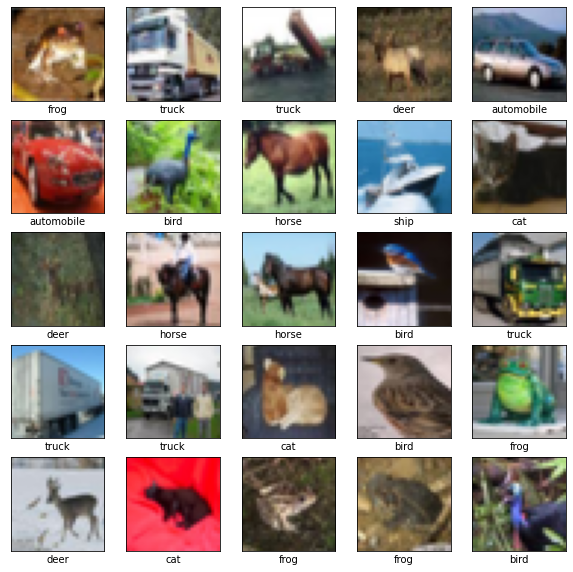

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Crear la base de la CNN (extractor de features)

Antes de empezar, se recomienda tener a mano la [documentación de referencia de la librería TensorFlow](https://www.tensorflow.org/api_docs/python/tf), ya que les será muy útil para indagar en la definión de las funciones utilizadas en esta parte del notebook

Las 6 líneas de código presentadas a continuación definen la base de la red convolucional utilizando un patrón común: una pila de [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) y [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers. Este conjunto de capas serán las encargadas de extraer las features de las imágenes una vez que se haya entrenado el modelo completo.

Esta CNN toma como entrada tensores de la forma `input_shape=(32, 32, 3)`, donde cada argumento corresponde a `(alto, ancho, canales)`, es decir, el formato de las imágenes del dataset CIFAR. La forma de la capa de entrada se especifica en la primer capa de convolución `Conv2D`. 

Cada capa `Conv2D` requiere que se especifiquen una serie de argumentos. En este caso la primera `Conv2D` especifica 32 filtro de tamaño 3x3, mientras que la segunda y tercera `Conv2D` especifican 64 filtro de tamaño 3x3 cada una.

Además, entre cada capa Conv2D tenemos una capa de `MaxPooling` de tamaño 2x2 cada una.


In [ ]:
model = models.Sequential()
# 1st convolution layer: 32 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# 1st max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 2nd convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 2nd max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 3st convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Ahora podemos visualizar la arquitectura de nuestra CNN haciendo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Arriba se puede ver que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D con la forma (None, **alto, ancho, canales**). Por el momento el valor "None" va a ser ignorado. Las dimensiones de **ancho** y **alto** tienden a disminuir a medida que se avanza más profundamente en la red (ya que no se ha especificado el uso de *padding*). El número de **canales** se corresponde con la cantidad de filtros (o lo que es lo mismo, la cantidad de features maps de salida para cada `Conv2D`). Dado que el ancho y alto de la imagen de entrada se reduce sistemáticamente a medida que se avanza en la red, se puede pagar el costo computacional para añadir más canales de salida en cada capa `Conv2D`.

Finalmente, la última columna de la tabla presenta la cantidad de parámetros de cada capa, es decir, la cantidad de pesos.


## Añadir capas densas (Clasificador)

Para completar nuestro modelo, se usa el último tensor de salida de la arquitectura base para alimentar una ANN que permita realizar la clasificación. Recuerden que las capas `Dense` toman vectores como entrada (que son arreglos 1D), mientras que la salida del tensor es 3D. En primer lugar, vamos a aplanar la salida 3D de la arquitectura base a 1D, y a continuación, añadimos dos capas densas. CIFAR tiene 10 clases de salida, por lo que la capa de salida contiene 10 nodos y una activación **softmax** (otro tipo de función de activación con la misma función de *sigmoid* o *ReLu* vistas antes).

In [ ]:
# Flatten layer
model.add(layers.Flatten())
# Dense layer
model.add(layers.Dense(64, activation='relu'))
# Output layer
model.add(layers.Dense(10, activation='softmax'))

Para ver la arquitectura completa de nuestro modelo luego de añadir las capas totalmente conectadas, hacemos:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Como se puede ver, la salida de la arquitectura base tiene la forma (4, 4, 64), que es aplanada a un vector de 1024 nodos antes de pasar por los dos capas densas de la ANN.

## Compilar y entrenar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5484 - accuracy: 0.4326 - val_loss: 1.2893 - val_accuracy: 0.5348
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1706 - accuracy: 0.5834 - val_loss: 1.0794 - val_accuracy: 0.6156
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0279 - accuracy: 0.6391 - val_loss: 0.9947 - val_accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9335 - accuracy: 0.6721 - val_loss: 0.9625 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8640 - accuracy: 0.6964 - val_loss: 0.9098 - val_accuracy: 0.6876
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8129 - accuracy: 0.7124 - val_loss: 0.8837 - val_accuracy: 0.6926
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7593 - accuracy: 0.7348 - val_loss: 0.8554 -

## Evaluar el modelo

313/313 - 4s - loss: 0.8601 - accuracy: 0.7121 - 4s/epoch - 11ms/step


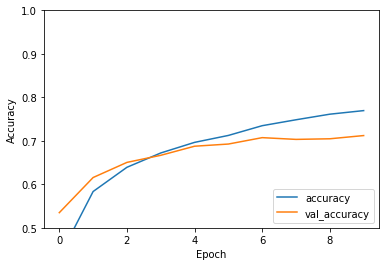

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7121000289916992


Finalmente, vemos que nuestra CNN ha logrado un *accuracy* sobre el conjunto de pruebas cercano al 70%, lo cual no está nada mal para un par de líneas de código y unos minutos de ejecución.

## Visualizar filtros convolucionales aprendidos en la CNN

Una vez realizado el proceso de entrenamiento, las CNNs usan los filtros aprendidos para producir features maps sobre la imagen de entrada o sobre otros features maps que representan la salida en capas anteriores. Estos filtros son arreglos bidimensionales que contienen los pesos estimados durante el entrenamiento.



conv2d_1
(3, 3, 32, 64)


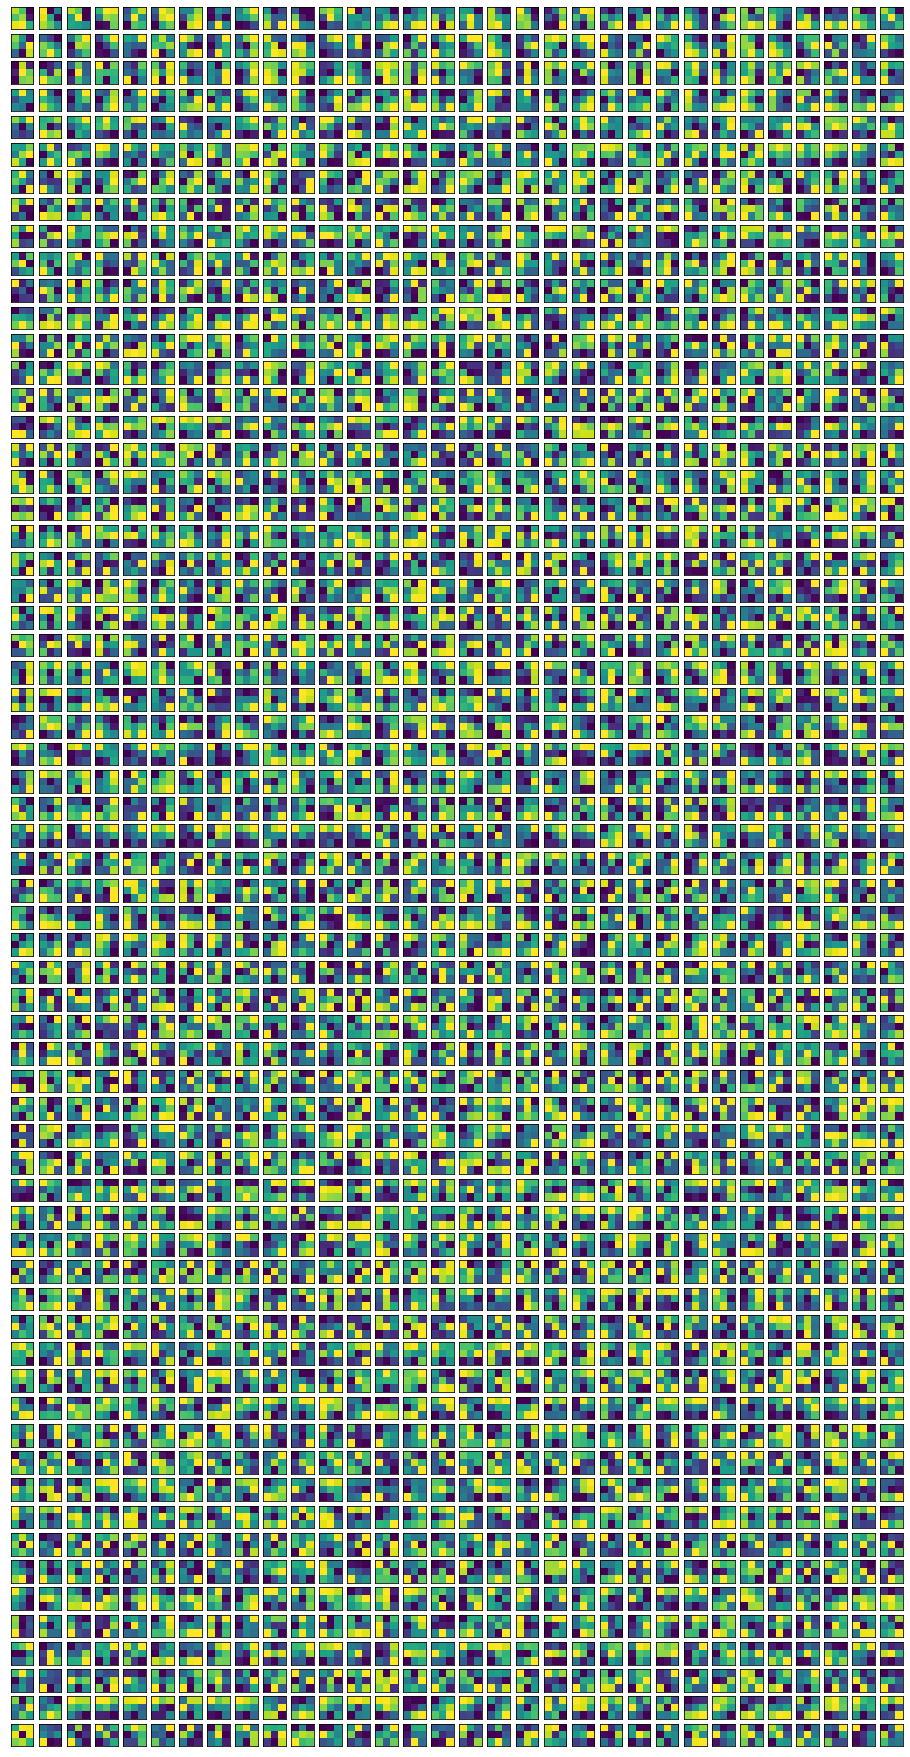

In [ ]:
import math
import numpy as np

# Iterate thru all the layers of the model

layers = [model.layers[2]]  # First layer
#layers = model.layers       # All layer (WARNING: Take a lot of time!!)
for layer in layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between 0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape)
        filter_cnt=1
        
        fig = plt.figure(figsize=(math.ceil(filters.shape[2]/2), math.ceil(filters.shape[3]/2)))
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:,i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[2]):
                ax = fig.add_subplot(filters.shape[3], filters.shape[2], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,j])
                filter_cnt += 1
        plt.show()

## Visualizar features maps generados con la CNN

Como ya vimos, los features maps se generan aplicando los filtros convolucionales a la imagen de entrada o a otros feratures maps que representan la salida en capas anteriores. La visualización de features maps proporciona información sobre las representaciones internas dada una entrada específica para cada una de las capas convolucionales del modelo.




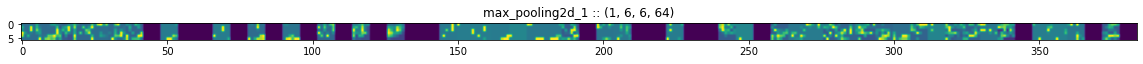

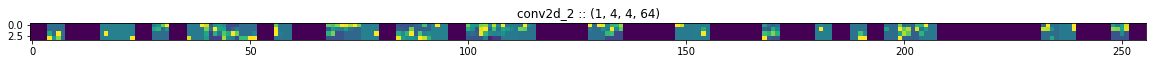

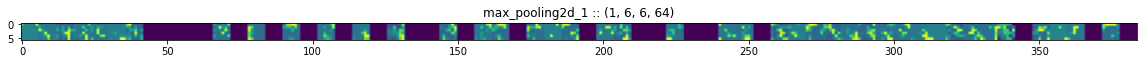

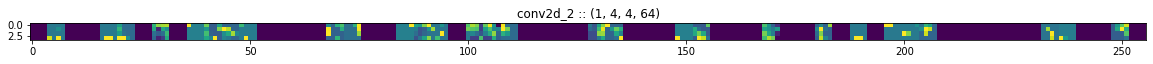

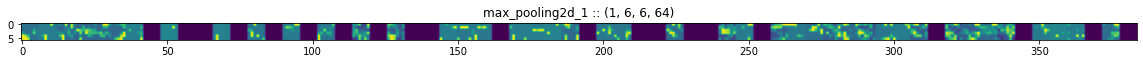

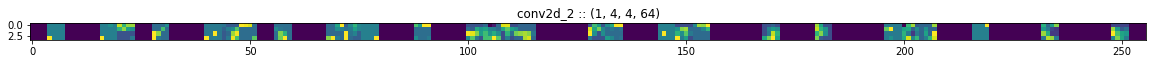

In [ ]:
import numpy as np

np.seterr(divide='ignore', invalid='ignore')

# Retrieve layer and its names
idx_layer = [3,4] # Change idx_layer values for specific layers
successive_outputs = [model.layers[i].output for i in idx_layer]
layer_names = [model.layers[i].name for i in idx_layer]

# Define a new Model
# Input = image 
# Outputs = intermediate representations for all layers in the previous model after the first.
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Shape images
height = test_images.shape[1]
width = test_images.shape[2]
channel = test_images.shape[3]
# For some images in dataset. Chage to select another images
for img_idx in (0,1000,2000):
  #Load the input image
  img = test_images[img_idx, :, :, :]
  img = img.reshape(1, height, width, channel)

  # Let's run input image through our vislauization network
  # to obtain all intermediate representations for the image.
  successive_feature_maps = visualization_model.predict(img)
 
  for idx_sfm in range(len(successive_feature_maps)):
    layer_name = layer_names[idx_sfm]
    feature_map = successive_feature_maps[idx_sfm]
    
    # Only in case of selecting a single layer 
    if len(feature_map.shape)==3:
      x = feature_map.shape[0]
      y = feature_map.shape[1]
      z = feature_map.shape[2]
      feature_map = feature_map.reshape(1, x, y, z)

    if len(feature_map.shape) == 4:
      # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
      n_features = feature_map.shape[-1]  # number of features in the feature map
      size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
      
      # We will tile our images in this matrix
      display_grid = np.zeros((size, (size) * n_features))
      
      # Postprocess the feature to be visually palatable
      for idx_nfeat in tf.range(n_features):
        x  = feature_map[0, :, :, idx_nfeat]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        # Tile each filter into a horizontal grid
        display_grid[:, idx_nfeat * size : (idx_nfeat + 1) * size] = x# Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      #plt.title ( class_names[train_labels[img_idx]] + " :: " + layer_name + " :: " + str(feature_map.shape) )
      plt.title (layer_name + " :: " + str(feature_map.shape) )
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )

---

# Trabajo Práctico 1 (segunda parte)

Nombre: Gastón Briozzo

DNI: 41 279 511

E_mail: gbriozzo@mi.unc.edu.ar

---

## **EJERCICIO 2.1**: entrenar la CNN para resolver un nuevo problema

Reproduzca el workflow completo del tutorial presentado en este notebook para el data set utilizado en el notebook anterior con ANN: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Esto implica:

- Separar el nuevo dataset en un **conjunto de entrenamiento** y un **conjunto de testeo**
- Realizar el **entrenamiento de la CNN**
- Realizar **evaluación del modelo** y reportar los resultados
- Presentar una **comparación** entre los resultados obtenidos con ANN y CNN.

### 2.1.1: Separar el nuevo dataset en un conjunto de entrenamiento y un conjunto de testeo

Primero, importamos las mismas librerias que en el notebook anterior

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


Ahora si, importamos el dataset y lo separamos en conjuntos de entrenamiento y test

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Normalizamos

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Actualizamos el nombre correspondiente a los labels del nuedo dataset

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Veamos algunas imágenes

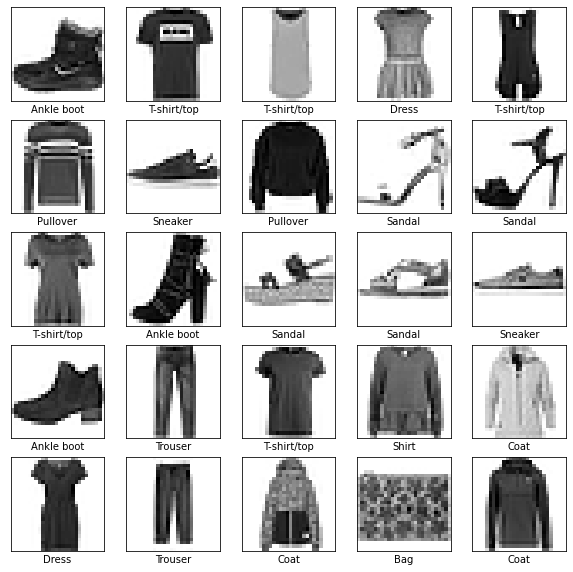

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Todo parece estar en orden

### 2.1.2: Realizar el entrenamiento de la CNN

Primero, actualizamos las librerias (si no hacemos esto da error, revisar por que)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Para evitar confusiones, vamos a definir un nuevo modelo siguiendo el desarrollo presentado anteriormente

In [ ]:
new_model = models.Sequential()

new_model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(56, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(56, (3, 3), activation='relu'))

new_model.add(layers.Flatten())
new_model.add(layers.Dense(56, activation='relu'))
new_model.add(layers.Dense(10, activation='softmax'))

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten_1 (Flatten)         (None, 504)              

Entrenamos el modelo con el nuevo dataset

In [ ]:
new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = new_model.fit(train_images, train_labels, epochs=10, 
                        validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5200 - accuracy: 0.8098 - val_loss: 0.3782 - val_accuracy: 0.8620
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3347 - accuracy: 0.8777 - val_loss: 0.3220 - val_accuracy: 0.8851
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2877 - accuracy: 0.8947 - val_loss: 0.3159 - val_accuracy: 0.8854
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2581 - accuracy: 0.9064 - val_loss: 0.2818 - val_accuracy: 0.8968
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2356 - accuracy: 0.9130 - val_loss: 0.2903 - val_accuracy: 0.8974
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2169 - accuracy: 0.9192 - val_loss: 0.2735 - val_accuracy: 0.9027
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1995 - accuracy: 0.9257 - val_loss: 0.2589 -

El resultado parece bastante bueno, cerca del 90% de accuracy tanto en train como en val.

### 2.1.3: Realizar evaluación del modelo y reportar los resultados

Veamos como evoluciona la accuracy a medida que aumentan las epochs

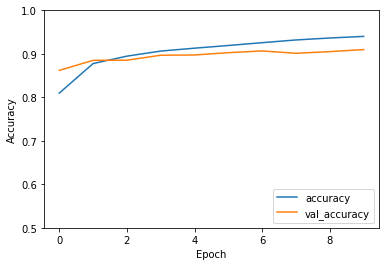

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Reportamos los resultados

In [ ]:
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest Loss    :', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 - 3s - loss: 0.2724 - accuracy: 0.9098 - 3s/epoch - 8ms/step

Test Loss    : 0.2724168300628662

Test Accuracy: 0.9097999930381775


Cerca del 90% de acc, nada mal.

### 2.1.4: Presentar una comparación entre los resultados obtenidos con ANN y CNN

#### Importamos y preprocesamos las imágenes

In [ ]:
# Importamos las librerias necesarias

from PIL import Image
from numpy import asarray
from matplotlib.image import imread

In [ ]:
# Importamos las nuevas imágenes desde Drive
# Estas imágenes se almacenarán en un array, igual que sus respectivos labels

from google.colab import drive
drive.mount('/content/drive')

images = []
new_labels = []

# T-shirt/top #######################################

image = Image.open("/content/drive/MyDrive/VpC/Tshirt1.jfif")
images.append(image)
new_labels += [0]

image = Image.open("/content/drive/MyDrive/VpC/Tshirt2.jfif")
images.append(image)
new_labels += [0]

image = Image.open("/content/drive/MyDrive/VpC/Tshirt3.webp")
images.append(image)
new_labels += [0]

# Trouser ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Trouser1.jfif")
images.append(image)
new_labels += [1]

image = Image.open("/content/drive/MyDrive/VpC/Trouser2.jpg")
images.append(image)
new_labels += [1]

image = Image.open("/content/drive/MyDrive/VpC/Trouser3.webp")
images.append(image)
new_labels += [1]

# Pullover ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Pullover1.jfif")
images.append(image)
new_labels += [2]

image = Image.open("/content/drive/MyDrive/VpC/Pullover2.jfif")
images.append(image)
new_labels += [2]

image = Image.open("/content/drive/MyDrive/VpC/Pullover3.jfif")
images.append(image)
new_labels += [2]

# Dress ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Dress1.jpg")
images.append(image)
new_labels += [3]

image = Image.open("/content/drive/MyDrive/VpC/Dress2.jpg")
images.append(image)
new_labels += [3]

image = Image.open("/content/drive/MyDrive/VpC/Dress3.jfif")
images.append(image)
new_labels += [3]

# Coat ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Coat1.jpg")
images.append(image)
new_labels += [4]

image = Image.open("/content/drive/MyDrive/VpC/Coat2.jpg")
images.append(image)
new_labels += [4]

image = Image.open("/content/drive/MyDrive/VpC/Coat3.jfif")
images.append(image)
new_labels += [4]

# Sandal ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Sandal1.webp")
images.append(image)
new_labels += [5]

image = Image.open("/content/drive/MyDrive/VpC/Sandal2.jfif")
images.append(image)
new_labels += [5]

image = Image.open("/content/drive/MyDrive/VpC/Sandal3.jfif")
images.append(image)
new_labels += [5]

# Shirt ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Shirt1.jpg")
images.append(image)
new_labels += [6]

image = Image.open("/content/drive/MyDrive/VpC/Shirt2.jpg")
images.append(image)
new_labels += [6]

image = Image.open("/content/drive/MyDrive/VpC/Shirt3.jfif")
images.append(image)
new_labels += [6]

# Sneaker ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Sneaker1.jfif")
images.append(image)
new_labels += [7]

image = Image.open("/content/drive/MyDrive/VpC/Sneaker2.jpg")
images.append(image)
new_labels += [7]

image = Image.open("/content/drive/MyDrive/VpC/Sneaker3.jfif")
images.append(image)
new_labels += [7]

# Bag ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Bag1.jfif")
images.append(image)
new_labels += [8]

image = Image.open("/content/drive/MyDrive/VpC/Bag2.jfif")
images.append(image)
new_labels += [8]

image = Image.open("/content/drive/MyDrive/VpC/Bag3.jpg")
images.append(image)
new_labels += [8]

# Ankle boot ###########################################

image = Image.open("/content/drive/MyDrive/VpC/Ankleboot1.webp")
images.append(image)
new_labels += [9]

image = Image.open("/content/drive/MyDrive/VpC/Ankleboot2.jfif")
images.append(image)
new_labels += [9]

image = Image.open("/content/drive/MyDrive/VpC/Ankleboot3.jfif")
images.append(image)
new_labels += [9]

new_labels = asarray(new_labels)
#image.size


Mounted at /content/drive


In [ ]:
# Ahora, a cada nueva imágen se le realizará el preprocesado necesario para que esta sea compatible con la ANN entrenada

new_images = []                                      # Las imágenes preprocesadas se almacenarán en este array

for image in images:
    image = image.resize((28,28),Image.ANTIALIAS)    # Cambiamos el tamaño de la imagen a 28x28 pixeles
    image = image.convert('L')                       # Pasamos de RGB a grises
    image = asarray(image)                           # Cambiamos de formato a np array
    image = 1 - image/255.0                          # Renormalizamos los valores por pixel
    image = np.resize(image,(28,28))                 # De nuevo, cambiamos el formato de la imágen
    new_images.append(image)                         # Agregamos la imágen preprocesada a la lista

new_images = asarray(new_images)                     # Cambiamos el formato de la lista de imágenes para que sea compatible con la ANN
print(new_images.shape)

(30, 28, 28)


#### Predicción y reporte sobre el nuevo dataset

In [ ]:
# Evaluamos loss y accuracy en el nuevo dataset

new_loss, new_acc = new_model.evaluate(new_images,  new_labels, verbose=2)

print('\nNew Loss    :', new_loss)
print('\nNew Accuracy:', new_acc)

1/1 - 0s - loss: 3.1579 - accuracy: 0.6000 - 144ms/epoch - 144ms/step

New Loss    : 3.1579437255859375

New Accuracy: 0.6000000238418579


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

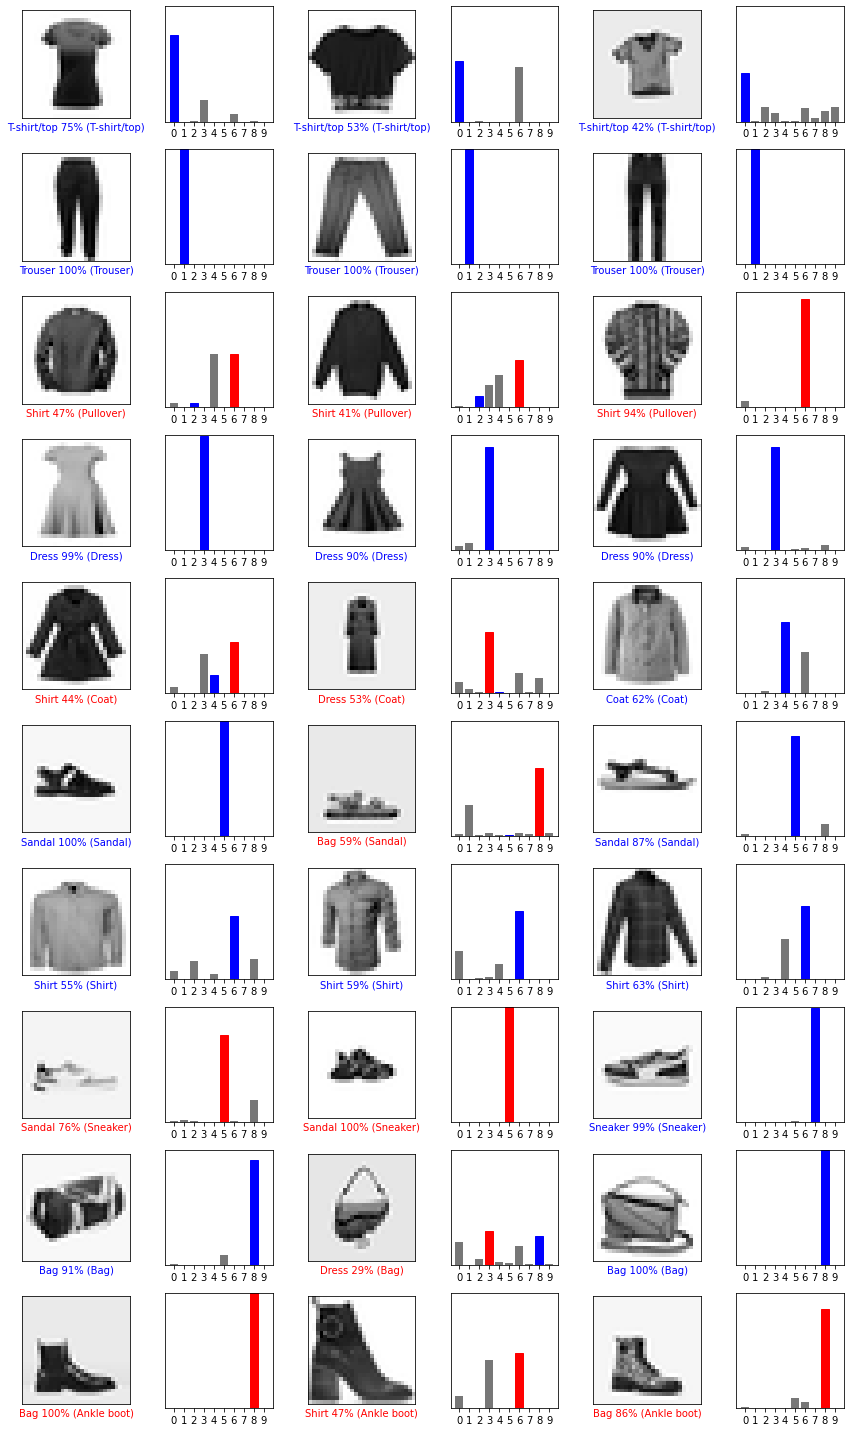

In [ ]:
# Veamos como se comporta el modelo con cada imágen del nuevo dataset

new_predictions = new_model.predict(new_images)

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, new_predictions[i], new_labels, new_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, new_predictions[i], new_labels)
plt.tight_layout()
plt.show()

El resultado con CNN sigue sin ser el mejor (50% acc) pero es significativamente mejor al obtenido con ANN (30% acc).

## **EJERCICIO 2.2 (OPCIONAL)**: proponer nuevas arquitecturas para la CNN

Empleando los conceptos aprendidos en este tutorial, proponga dos nuevas arquitecturas para la CNN del tutorial (la que utiliza el dataset CIFAR10), una que  mejore los resultados de la anterior y otra que los empeore.

TIP: aumentar o reducir drásticamente la cantidad de capas y nodos, pero ojo con los tiempos de ejecución para arquitecturas muy grandes!

In [ ]:
# EJERCICIO 2.2 (OPCIONAL)
# ...